# Spotify Popularity Prediction

## 1. 목표 (T)


* 노래의 인기를 예측해보자!

## 2. 관련 데이터 수집

In [1]:
# Numpy는 수학 관련 라이브러리 => 데이터분석용 라이브러리(Pandas), 딥러닝 라이브러리(TF, PyTorch)
import numpy as np
# 데이터분석(정형데이터) 라이브러리
import pandas as pd
# 시각화 라이브러리(일반적인)
import matplotlib.pyplot as plt
# 시각화 라이브러리(간편)
import seaborn as sns

In [2]:
!gdown --id "1tFSeDdJYrOcVzQnxHQdJmV2Bp60rJ9O-"
!gdown --id "1NMpQ2nanbUUGOUo1PLBWgbxy59O69SZs"

Downloading...
From: https://drive.google.com/uc?id=1tFSeDdJYrOcVzQnxHQdJmV2Bp60rJ9O-
To: /content/song_data.csv
2.22MB [00:00, 70.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1NMpQ2nanbUUGOUo1PLBWgbxy59O69SZs
To: /content/song_info.csv
100% 1.24M/1.24M [00:00<00:00, 81.5MB/s]


In [3]:
# Pandas를 사용해서 CSV 파일 불러오기
# CSV 파일을 업로드 하세요
spotify_song_data= pd.read_csv("song_data.csv")
spotify_song_info= pd.read_csv("song_info.csv") 
song_info=spotify_song_info.copy()
song_data=spotify_song_data.copy()

In [4]:
song_data.head(5)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [5]:
song_data.shape

(18835, 15)

In [6]:
spotify_song_info.head(5)

,song_name,artist_name,album_names,playlist
0,Boulevard of Broken Dreams,Green Day,Greatest Hits: God's Favorite Band,00s Rock Anthems
1,In The End,Linkin Park,Hybrid Theory,00s Rock Anthems
2,Seven Nation Army,The White Stripes,Elephant,00s Rock Anthems
3,By The Way,Red Hot Chili Peppers,By The Way (Deluxe Version),00s Rock Anthems
4,How You Remind Me,Nickelback,Silver Side Up,00s Rock Anthems


In [7]:
spotify_song_info.shape

(18835, 4)

## 3. 데이터 확인 통찰, 가설

### 3-1. 데이터가 빠진 부분이 없는가?




In [8]:
song_data.isnull().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

### 3-2 데이터를 확인

In [9]:
song_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [10]:
song_data.key = song_data.key.astype(float)
song_data.song_duration_ms = song_data.song_duration_ms.astype(float)
song_data.time_signature = song_data.time_signature.astype(float)
song_data.audio_mode = song_data.audio_mode.astype(float)


In [11]:
song_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  float64
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  float64
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  float64
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  float64
 14  audio_valence     18835 non-null  float64
dtypes: float64(13), int64(1), object(1)
memory usage: 2.2+ MB


In [12]:
song_data.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [13]:
song_data['popularity'] = [ 1 if i >= 69.0 else 0 for i in song_data.song_popularity]
song_data['popularity'].value_counts()

0    14025
1     4810
Name: popularity, dtype: int64

In [14]:
# 인기있는 곡들이 가진 특징
popularity = song_data[song_data['popularity'] == 1]
popularity.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity
count,4810.00000,4810.000000,4810.000000,4810.000000,4810.000000,4810.000000,4810.000000,4810.000000,4810.000000,4810.000000,4810.000000,4810.000000,4810.000000,4810.000000,4810.0
mean,78.25052,218996.596050,0.207509,0.663877,0.659254,0.018166,5.123285,0.173475,-6.511325,0.613514,0.107150,120.856579,3.972557,0.517530,1.0
std,7.76009,48028.885557,0.240750,0.147162,0.182687,0.100254,3.656602,0.136750,2.959701,0.486995,0.101772,27.472955,0.256493,0.229166,0.0
min,69.00000,67000.000000,0.000018,0.072200,0.002890,0.000000,0.000000,0.021500,-34.255000,0.000000,0.022400,60.048000,1.000000,0.035200,1.0
25%,72.00000,190417.500000,0.027525,0.568000,0.544000,0.000000,1.000000,0.091925,-7.719000,0.000000,0.039400,98.970000,4.000000,0.333000,1.0
50%,76.00000,212696.000000,0.107000,0.673000,0.678000,0.000000,5.000000,0.121000,-5.931000,1.000000,0.060000,119.945000,4.000000,0.508000,1.0
75%,83.00000,240706.000000,0.297000,0.767000,0.799000,0.000092,8.000000,0.203000,-4.599250,1.000000,0.134000,139.755000,4.000000,0.690000,1.0
max,100.00000,547733.000000,0.996000,0.978000,0.997000,0.968000,11.000000,0.978000,-0.739000,1.000000,0.733000,205.999000,5.000000,0.980000,1.0


In [15]:
song_data.corr()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity
song_popularity,1.000000,-0.018899,-0.065181,0.104290,0.001365,-0.130907,-0.013160,-0.038937,0.099442,-0.004969,0.021479,-0.022672,0.034983,-0.052895,0.675284
song_duration_ms,-0.018899,1.000000,-0.097882,-0.104985,0.092688,-0.015188,-0.004615,0.016086,0.016469,-0.026328,-0.083447,0.012791,0.000264,-0.063421,0.007677
acousticness,-0.065181,-0.097882,1.000000,-0.182500,-0.662639,0.173098,-0.002025,-0.082537,-0.557744,0.064100,-0.093574,-0.136421,-0.157177,-0.121670,-0.103510
danceability,0.104290,-0.104985,-0.182500,1.000000,0.044373,-0.130483,0.007723,-0.090694,0.177639,-0.106539,0.213728,-0.121286,0.136391,0.332014,0.114080
energy,0.001365,0.092688,-0.662639,0.044373,1.000000,-0.205914,0.020416,0.167143,0.755516,-0.051605,0.062053,0.162448,0.146265,0.316742,0.039004
instrumentalness,-0.130907,-0.015188,0.173098,-0.130483,-0.205914,1.000000,-0.009463,-0.032887,-0.390248,-0.014983,-0.081138,-0.036934,-0.069181,-0.178570,-0.158157
key,-0.013160,-0.004615,-0.002025,0.007723,0.020416,-0.009463,1.000000,-0.008193,0.010452,-0.169848,0.033639,0.003239,-0.008282,0.025356,-0.026881
liveness,-0.038937,0.016086,-0.082537,-0.090694,0.167143,-0.032887,-0.008193,1.000000,0.102450,-0.001035,0.090845,0.031876,0.013289,0.013789,-0.025119
loudness,0.099442,0.016469,-0.557744,0.177639,0.755516,-0.390248,0.010452,0.102450,1.000000,-0.058506,0.078164,0.129938,0.119241,0.199696,0.143221
audio_mode,-0.004969,-0.026328,0.064100,-0.106539,-0.051605,-0.014983,-0.169848,-0.001035,-0.058506,1.000000,-0.111627,0.020448,-0.024042,-0.004558,-0.017722


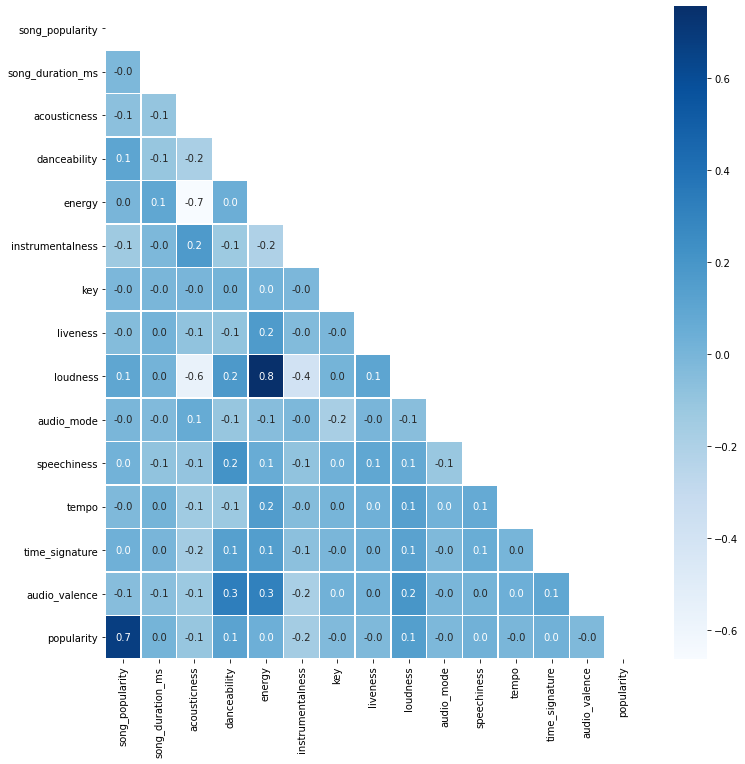

In [16]:
f, ax = plt.subplots(figsize = (12, 12))
mask = np.zeros_like(song_data.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(song_data.corr(), annot = True, linewidths = 0.4, linecolor = 'white', fmt = '.1f', ax = ax, cmap = 'Blues', mask = mask)
plt.show()

### 3-3 (그래프를 사용)범주형 변수 분석

In [17]:
def bar_plot(x):
  var = song_data[x]
  var_value = var.value_counts()
  plt.figure(figsize = (9, 3))
  plt.bar(var_value.index, var_value)
  plt.xticks(var_value.index, var_value.index.values)
  plt.ylabel("Freq")
  plt.title(x)
  plt.show()

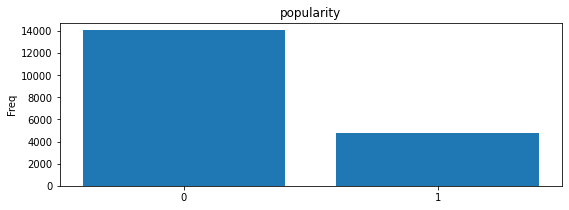

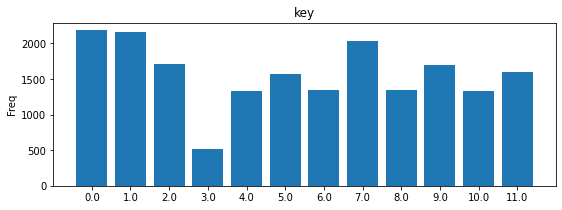

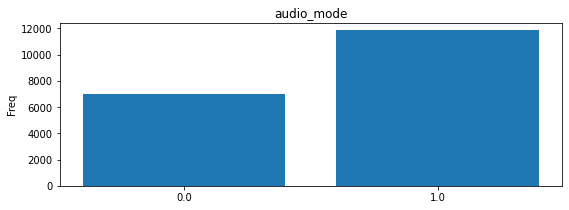

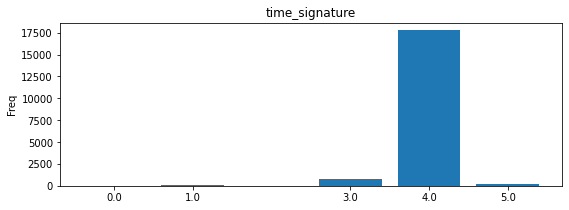

In [18]:
category1 = ['popularity', 'key', 'audio_mode', 'time_signature']

for c in category1:
  bar_plot(c)

### 3-4 이상치 탐색을 위한 단순 데이터 분석

In [19]:
song_data[['key', 'popularity']].groupby(['key'], as_index = False).mean().sort_values(by = 'popularity', ascending = False)

,key,popularity
1,1.0,0.324861
6,6.0,0.282754
8,8.0,0.260934
0,0.0,0.260770
5,5.0,0.259848
11,11.0,0.259375
4,4.0,0.251696
10,10.0,0.250939
2,2.0,0.232070
9,9.0,0.220259


In [20]:
from collections import Counter
def detect_outliers(df, features):
  outlier_indices = []
  for c in features:
    Q1 = np.percentile(df[c], 25)
    Q3 = np.percentile(df[c], 75)
    IQR = Q3 - Q1
    outlier_step = IQR * 1.5
    outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index #filtre
    outlier_indices.extend(outlier_list_col)
  outlier_indices = Counter(outlier_indices)
  multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2) 
  return multiple_outliers

In [21]:
song_data.loc[detect_outliers(song_data,["song_popularity","song_duration_ms","danceability","energy","instrumentalness","liveness","loudness","speechiness","audio_valence"])]

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity
232,La Maza,58,351400.0,0.6520,0.555,0.331,0.000012,9.0,0.235,-17.718,0.0,0.2700,170.603,3.0,0.437,0
253,Whole Lotta Love,77,333893.0,0.0484,0.412,0.902,0.131000,9.0,0.405,-11.600,1.0,0.4050,89.740,4.0,0.422,1
501,Do You Feel Like We Do,48,836666.0,0.0439,0.295,0.568,0.011700,0.0,0.977,-8.232,1.0,0.0284,98.284,4.0,0.384,0
981,The Times They Are A-Changin' - Live at Sony M...,49,348560.0,0.6300,0.393,0.416,0.007910,9.0,0.986,-13.243,1.0,0.0401,163.604,3.0,0.512,0
1113,November Rain,38,537506.0,0.0165,0.197,0.629,0.279000,11.0,0.125,-9.291,1.0,0.0300,79.495,4.0,0.221,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15247,I Know You So Well,8,102661.0,0.9230,0.679,0.311,0.721000,0.0,0.813,-16.557,0.0,0.1050,60.724,4.0,0.304,0
16642,same stars,46,116918.0,0.2510,0.687,0.284,0.862000,0.0,0.496,-19.504,1.0,0.0378,115.996,4.0,0.159,0
17723,Dutch Spring,0,205623.0,0.1960,0.510,0.843,0.135000,6.0,0.569,-4.958,0.0,0.3910,83.355,4.0,0.832,0
3720,Racism And Injustice,21,260160.0,0.9220,0.650,0.316,0.000000,9.0,0.739,-18.244,0.0,0.9400,117.198,4.0,0.306,0


In [22]:
song_data = song_data.drop(detect_outliers(song_data,["song_popularity","song_duration_ms","danceability","energy","instrumentalness","liveness","loudness","speechiness","audio_valence"]))

In [23]:
song_data

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity
0,Boulevard of Broken Dreams,73,262333.0,0.005520,0.496,0.682,0.000029,8.0,0.0589,-4.095,1.0,0.0294,167.060,4.0,0.474,1
1,In The End,66,216933.0,0.010300,0.542,0.853,0.000000,3.0,0.1080,-6.407,0.0,0.0498,105.256,4.0,0.370,0
2,Seven Nation Army,76,231733.0,0.008170,0.737,0.463,0.447000,0.0,0.2550,-7.828,1.0,0.0792,123.881,4.0,0.324,1
3,By The Way,74,216933.0,0.026400,0.451,0.970,0.003550,0.0,0.1020,-4.938,1.0,0.1070,122.444,4.0,0.198,1
4,How You Remind Me,56,223826.0,0.000954,0.447,0.766,0.000000,10.0,0.1130,-5.065,1.0,0.0313,172.011,4.0,0.574,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645.0,0.893000,0.500,0.151,0.000065,11.0,0.1110,-16.107,1.0,0.0348,113.969,4.0,0.300,0
18831,Answers,60,205666.0,0.765000,0.495,0.161,0.000001,11.0,0.1050,-14.078,0.0,0.0301,94.286,4.0,0.265,0
18832,Sudden Love (Acoustic),23,182211.0,0.847000,0.719,0.325,0.000000,0.0,0.1250,-12.222,1.0,0.0355,130.534,4.0,0.286,0
18833,Gentle on My Mind,55,352280.0,0.945000,0.488,0.326,0.015700,3.0,0.1190,-12.020,1.0,0.0328,106.063,4.0,0.323,0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


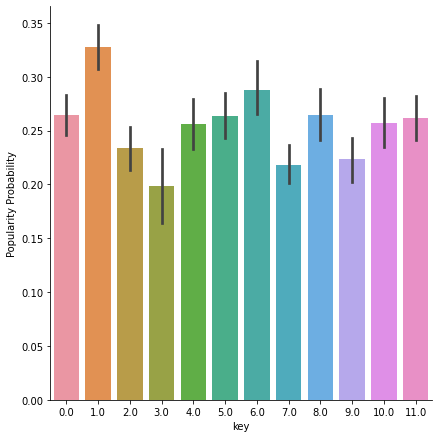

In [24]:
g = sns.factorplot(x = "key", y = "popularity", data = song_data, kind = "bar", size = 6)
g.set_ylabels("Popularity Probability")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


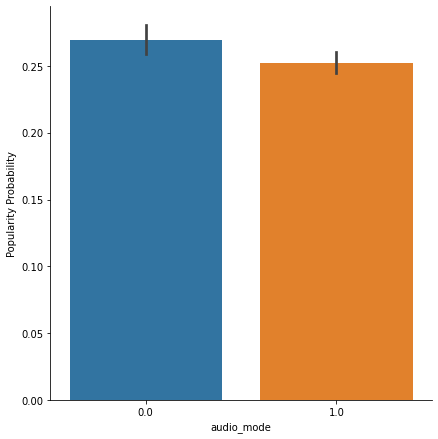

In [25]:
g = sns.factorplot(x = "audio_mode", y = "popularity", data = song_data, kind = "bar", size = 6)
g.set_ylabels("Popularity Probability")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


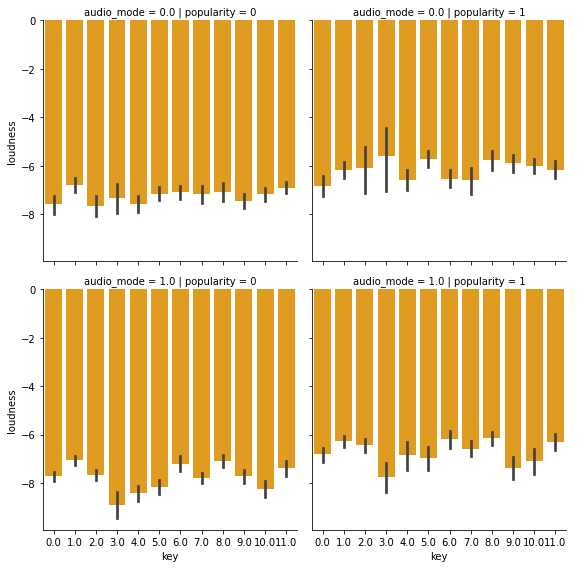

In [26]:
g = sns.FacetGrid(song_data, row = "audio_mode", col = "popularity", size = 4)
g.map(sns.barplot, "key", "loudness",color="orange")
g.add_legend()
plt.show()

### 3.5 특징 공학(다른 데이터를 병합해서 새로운 데이터를 만들어보자.)

In [41]:
popularity_song_name = pd.concat([song_data.popularity, song_data.song_name], axis=1)
popularity_song_name.head(5)

,popularity,song_name
0,1,Boulevard of Broken Dreams
1,0,In The End
2,1,Seven Nation Army
3,1,By The Way
4,0,How You Remind Me


In [42]:
import re
import nltk as nlp
from nltk.corpus import stopwords

nlp.download('wordnet')
nlp.download('punkt')
nlp.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
song_name = [ word for word in popularity_song_info.song_name if not word in set(stopwords.words('english'))]

In [44]:
lemma = nlp.WordNetLemmatizer()

In [45]:
song_name = [ lemma.lemmatize(word) for word in song_name ]

In [46]:
song_name

['song_name', 'song_name']

In [47]:
song_name_list = []
for song_name in popularity_song_name.song_name:
  song_name = re.sub("[^a-zA-Z]", " ", song_name)
  song_name = song_name.lower()
  song_name = nlp.word_tokenize(song_name)
  lemma = nlp.WordNetLemmatizer()
  song_name = [ lemma.lemmatize(word) for word in song_name ]
  song_name = " ".join(song_name)
  song_name_list.append(song_name)

In [54]:
song_name_list

['boulevard of broken dream',
 'in the end',
 'seven nation army',
 'by the way',
 'how you remind me',
 'bring me to life',
 'last resort',
 'are you gon na be my girl',
 'mr brightside',
 'sex on fire',
 'the middle',
 'numb',
 'smooth criminal',
 'can t stop',
 'chop suey',
 'take me out',
 'i miss you',
 'best of you',
 'i write sin not tragedy',
 'kryptonite',
 'the kill bury me',
 'use somebody',
 'no one know',
 'jerk it out',
 'uprising',
 'hey there delilah',
 'blurry',
 'american idiot',
 'welcome to the black parade',
 'give you hell',
 'all my life',
 'like a stone',
 'it s been awhile',
 'i hate everything about you',
 'rollin air raid vehicle',
 'fat lip',
 'the pretender',
 'savior',
 'body',
 'sugar we re goin down',
 'last nite',
 'through glass',
 'the diary of jane single version',
 'down with the sickness',
 'wish you were here',
 'youth of the nation',
 'vertigo',
 'miss murder',
 'i bet you look good on the dancefloor',
 'steady a she go',
 'falling away from me',

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
max_features = 10
count_vectorizer = CountVectorizer(max_features = max_features, stop_words = "english")
sparse_matrix = count_vectorizer.fit_transform(song_name_list).toarray()
print(count_vectorizer.get_feature_names())
# 주요 10개 단어

['don', 'edit', 'feat', 'la', 'like', 'love', 'radio', 'remastered', 'remix', 'version']


In [49]:
song_name_list_df = pd.DataFrame(song_name_list, columns=['names'])
song_name_list_df

,names
0,boulevard of broken dream
1,in the end
2,seven nation army
3,by the way
4,how you remind me
...,...
18505,let it breathe
18506,answer
18507,sudden love acoustic
18508,gentle on my mind


In [50]:
artist = song_info.artist_name.tolist()
name_count = Counter(artist)
most_common_name = name_count.most_common(50)
most_common_name

[('Kanye West', 82),
 ('Lady Gaga', 78),
 ('Drake', 68),
 ('Khalid', 61),
 ('Eminem', 47),
 ('6ix9ine', 45),
 ('David Guetta', 45),
 ('Calvin Harris', 40),
 ('The Chainsmokers', 40),
 ('Lil Wayne', 39),
 ('Future', 39),
 ('Lil Baby', 38),
 ('Gucci Mane', 37),
 ('Post Malone', 36),
 ('DJ Snake', 35),
 ('Travis Scott', 35),
 ('Ariana Grande', 33),
 ('Logic', 33),
 ('Ed Sheeran', 32),
 ('Sia', 32),
 ('Celia Cruz', 31),
 ('Imagine Dragons', 30),
 ('Kendrick Lamar', 30),
 ('Shakira', 29),
 ('Quavo', 29),
 ('6LACK', 29),
 ('Martin Garrix', 29),
 ('Dua Lipa', 28),
 ('Shawn Mendes', 28),
 ('Camila Cabello', 26),
 ('Cardi B', 26),
 ('Beyoncé', 26),
 ('OutKast', 26),
 ('Maroon 5', 26),
 ('Lil Mosey', 26),
 ('Rihanna', 26),
 ('Ella Mai', 26),
 ('Sigala', 26),
 ('Sheck Wes', 25),
 ('Young Thug', 25),
 ('Billie Eilish', 25),
 ('Zedd', 25),
 ('The Beatles', 24),
 ('French Montana', 24),
 ('R3HAB', 24),
 ('Nicki Minaj', 23),
 ('G-Eazy', 23),
 ('Marshmello', 23),
 ('Tiësto', 23),
 ('Bad Bunny', 22)]

In [51]:
from textblob import TextBlob
popularity_song_name['sentiment'] = popularity_song_name['song_name'].map(lambda text: TextBlob(text).sentiment.polarity)

In [52]:
popularity_song_name.head()

,popularity,song_name,sentiment
0,1,Boulevard of Broken Dreams,-0.4
1,0,In The End,0.0
2,1,Seven Nation Army,0.0
3,1,By The Way,0.0
4,0,How You Remind Me,0.0


In [53]:
song_data = pd.concat([song_data, popularity_song_name.sentiment], axis=1)
song_data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity,sentiment
0,Boulevard of Broken Dreams,73,262333.0,0.005520,0.496,0.682,0.000029,8.0,0.0589,-4.095,1.0,0.0294,167.060,4.0,0.474,1,-0.4
1,In The End,66,216933.0,0.010300,0.542,0.853,0.000000,3.0,0.1080,-6.407,0.0,0.0498,105.256,4.0,0.370,0,0.0
2,Seven Nation Army,76,231733.0,0.008170,0.737,0.463,0.447000,0.0,0.2550,-7.828,1.0,0.0792,123.881,4.0,0.324,1,0.0
3,By The Way,74,216933.0,0.026400,0.451,0.970,0.003550,0.0,0.1020,-4.938,1.0,0.1070,122.444,4.0,0.198,1,0.0
4,How You Remind Me,56,223826.0,0.000954,0.447,0.766,0.000000,10.0,0.1130,-5.065,1.0,0.0313,172.011,4.0,0.574,0,0.0


## 머신러닝

In [63]:
y = song_data['popularity'].values

In [64]:
x = song_data.drop(['popularity', 'song_name'], axis = 1)

In [65]:
x.head()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,sentiment
0,73,262333.0,0.005520,0.496,0.682,0.000029,8.0,0.0589,-4.095,1.0,0.0294,167.060,4.0,0.474,-0.4
1,66,216933.0,0.010300,0.542,0.853,0.000000,3.0,0.1080,-6.407,0.0,0.0498,105.256,4.0,0.370,0.0
2,76,231733.0,0.008170,0.737,0.463,0.447000,0.0,0.2550,-7.828,1.0,0.0792,123.881,4.0,0.324,0.0
3,74,216933.0,0.026400,0.451,0.970,0.003550,0.0,0.1020,-4.938,1.0,0.1070,122.444,4.0,0.198,0.0
4,56,223826.0,0.000954,0.447,0.766,0.000000,10.0,0.1130,-5.065,1.0,0.0313,172.011,4.0,0.574,0.0


In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y)

In [67]:
X_test.shape

(4628, 15)

In [68]:
y_test.shape

(4628,)

In [70]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [71]:
print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

0.7434087307304423
0.7344425237683665
